In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif, chi2

from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from scipy import stats
import umap
from collections import Counter
from combat.pycombat import pycombat



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/vladimirk/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/vladimirk/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/vladimirk/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/vladimirk/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instanc

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/vladimirk/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/vladimirk/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/vladimirk/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/vladimirk/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instanc

AttributeError: _ARRAY_API not found

In [2]:
met_raw_df = pd.read_csv('../data/data_zscore_comp_id.csv')
met_raw_df.set_index(met_raw_df.columns[0], inplace=True)
met_raw_df

,BAYL-08997,BAYL-08998,BAYL-08999,BAYL-09000,BAYL-09001,BAYL-09002,BAYL-09003,BAYL-09004,BAYL-09005,BAYL-09006,...,s_21944,s_22832,s_22842,s_22997,s_23003,s_23077,s_23123,s_22787,s_23294,s_73385
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42370,-1.259948,0.170557,0.814204,0.038958,-0.504466,-0.757901,-0.986865,0.993000,0.986541,0.000250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,-0.610334,-0.811169,-0.554787,-0.603603,-0.549375,-0.631363,0.606882,1.238204,1.661840,-0.931552,...,-0.434904,-0.730548,-0.009508,-0.607362,0.219333,-0.767359,-0.421440,0.085019,-0.732586,-1.167603
27665,-1.201809,0.387317,-1.062940,0.525122,-0.973446,-0.253533,0.195547,0.769406,0.796718,-0.058625,...,0.825309,2.224161,0.182297,-0.697035,0.161942,-0.266286,0.775185,-0.640354,1.440073,0.458074
38395,-0.954275,-0.906589,4.929942,0.974496,-0.740805,0.642705,-0.293678,0.650630,1.008092,-0.778676,...,-1.505053,-1.112171,0.062801,-0.778621,0.574785,-0.251823,-0.822022,-1.332230,0.767016,-1.741468
437,0.240999,-0.454249,-0.000406,-0.542391,NaN,0.403722,-0.492163,0.252810,-0.517825,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
met_names_df = pd.read_excel('../data/BAYL-04-22MD+ Data Tables Updated.xlsx', sheet_name='Chemical Annotation')
met_names_df = met_names_df.loc[:, ['COMP_ID', 'CHEMICAL_NAME']].sort_values('COMP_ID')  # CHEMICAL_NAME
met_names_df.set_index('COMP_ID', inplace=True)
met_names_df.head()

,CHEMICAL_NAME
COMP_ID,
53,glutamine
54,tryptophan
55,beta-alanine
56,cystine
57,glutamate


In [4]:
clin_df = pd.read_csv('../data/sampleAttr.csv', index_col=0)
# Exclude ASPRE LR
clin_df = clin_df[clin_df['STUDY'] != 'ASPRE_LR']
clin_df

,ga.w,ASA_tri_chr,weight,crl,smoking,trimester,pe,ptIDs,consss_batch,BErm,conception,ASA,prev.pe,age,Compliance,height,STUDY,sle,race
sIDs,,,,,,,,,,,,,,,,,,,
BAYL-08997,13.400000,ASA - 1st Trimester,45.1,55.3,0,1,1.0,S1_1_Ca,batch-2023,batch_2023,7,True,7,36.64887063655031,94.444444,150,CHUK,0,Chinese
BAYL-08998,13.700000,ASA - 1st Trimester,82.2,63.1,0,1,1.0,S1_2_Ca,batch-2023,batch_2023,7,True,2,32.309377138945926,94.267516,171,CHUK,0,Chinese
BAYL-08999,13.400000,ASA - 1st Trimester,69.6,58.8,0,1,0.0,S1_1_Co,batch-2023,batch_2023,7,True,7,43.90143737166324,99.367089,161,CHUK,0,Chinese
BAYL-09000,14.600000,ASA - 1st Trimester,51.4,62.9,0,1,0.0,S1_2_Co,batch-2023,batch_2023,7,True,7,33.11430527036276,98.684211,154,CHUK,0,Chinese
BAYL-09001,13.100000,ASA - 1st Trimester,39.2,45.3,0,1,0.0,S1_4_Co,batch-2023,batch_2023,7,True,7,24.32032854209445,95.597484,161,CHUK,0,Chinese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s_23077,21.600000,PLACEBO - 2nd Trimester,71.0,60.2,No,2,0.0,pt_755998,batch-2021,batch_2021,Spontaneous,False,Multip-no PE,33.8562628336756,0.000000,162.0,from-2015,No,Black
s_23123,22.000000,PLACEBO - 2nd Trimester,58.1,53.6,No,2,0.0,pt_727062,batch-2021,batch_2021,Spontaneous,False,Nullip,25.3141683778234,0.000000,155.0,from-2015,No,Black
s_22787,22.100000,PLACEBO - 2nd Trimester,93.8,59.3,No,2,0.0,pt_20889,batch-2021,batch_2021,Spontaneous,False,Multip-no PE,29.7659137577002,0.000000,163.0,from-2015,No,Black


# Merge and preprocess data

In [5]:
met_raw_df = met_raw_df.loc[:, clin_df.index]  # Take only columns that exist in clinical data
met_raw_df

sIDs,BAYL-08997,BAYL-08998,BAYL-08999,BAYL-09000,BAYL-09001,BAYL-09002,BAYL-09003,BAYL-09004,BAYL-09005,BAYL-09006,...,s_21944,s_22832,s_22842,s_22997,s_23003,s_23077,s_23123,s_22787,s_23294,s_73385
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42370,-1.259948,0.170557,0.814204,0.038958,-0.504466,-0.757901,-0.986865,0.993000,0.986541,0.000250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,-0.610334,-0.811169,-0.554787,-0.603603,-0.549375,-0.631363,0.606882,1.238204,1.661840,-0.931552,...,-0.434904,-0.730548,-0.009508,-0.607362,0.219333,-0.767359,-0.421440,0.085019,-0.732586,-1.167603
27665,-1.201809,0.387317,-1.062940,0.525122,-0.973446,-0.253533,0.195547,0.769406,0.796718,-0.058625,...,0.825309,2.224161,0.182297,-0.697035,0.161942,-0.266286,0.775185,-0.640354,1.440073,0.458074
38395,-0.954275,-0.906589,4.929942,0.974496,-0.740805,0.642705,-0.293678,0.650630,1.008092,-0.778676,...,-1.505053,-1.112171,0.062801,-0.778621,0.574785,-0.251823,-0.822022,-1.332230,0.767016,-1.741468
437,0.240999,-0.454249,-0.000406,-0.542391,NaN,0.403722,-0.492163,0.252810,-0.517825,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
met_df = met_raw_df.merge(met_names_df, left_index=True, right_index=True)
met_df.set_index('CHEMICAL_NAME', inplace=True)
met_df = met_df.T
# met_df.loc[:, 'pe'] = clin_df['pe']
# met_df = met_df[clin_df['trimester'] == 3]
print(f'Initial number of metabolites: {met_df.shape[1]}')
met_df = met_df.loc[:, met_df.isnull().sum() < 0.2*met_df.shape[0]]  # Fill rate > 80%
print(f'Number of metabolites after Fill rate > 80% filter: {met_df.shape[1]}')
met_df = met_df[list(filter(lambda x: 'x' not in x.lower(), met_df.columns))]
print(f'Number of metabolites after removing X-molecules: {met_df.shape[1]}')
met_df = met_df.fillna(met_df.min())
met_df

Initial number of metabolites: 968
Number of metabolites after Fill rate > 80% filter: 736
Number of metabolites after removing X-molecules: 525


CHEMICAL_NAME,spermidine,1-methylnicotinamide,"12,13-DiHOME",alpha-ketoglutarate,kynurenate,3-phosphoglycerate,cholate,"5,6-dihydrothymine","9,10-DiHOME",linoleate (18:2n6),...,glycine conjugate of C10H14O2 (1)*,"sphingomyelin (d17:1/14:0, d16:1/15:0)*",6-bromotryptophan,dodecadienoate (12:2)*,N-acetyl-isoputreanine,glucuronide of piperine metabolite C17H21NO3 (4)*,sulfate of piperine metabolite C16H19NO3 (2)*,sulfate of piperine metabolite C16H19NO3 (3)*,sulfate of piperine metabolite C18H21NO3 (1)*,sulfate of piperine metabolite C18H21NO3 (3)*
BAYL-08997,-0.610334,-1.201809,-0.954275,-0.485987,0.598959,-0.660514,-0.355321,-0.898309,-0.667690,-0.874199,...,-0.939114,-0.838303,-1.399022,-0.656606,-1.702764,-0.667845,-0.884692,-0.810793,-0.770932,-0.683563
BAYL-08998,-0.811169,0.387317,-0.906589,-0.409053,0.612680,0.001887,-0.108802,-0.111114,-0.696468,-0.820280,...,-0.396659,-0.697519,0.887825,-1.112439,-0.969079,-1.029021,-0.466641,-0.426476,-0.438533,-0.397876
BAYL-08999,-0.554787,-1.062940,4.929942,0.022588,3.050217,-0.142467,-0.215959,-0.479178,2.368797,1.660334,...,0.851302,-0.742232,-0.390750,0.301971,-0.991800,0.009966,-0.514876,-0.396405,-0.244924,0.445289
BAYL-09000,-0.603603,0.525122,0.974496,-0.494779,-0.347355,-0.359097,-0.335079,-0.369941,0.309919,-0.618017,...,-0.487078,-0.952760,1.479042,-0.445710,-0.805737,-0.751043,-0.781056,-0.756450,-0.922030,-0.847816
BAYL-09001,-0.549375,-0.973446,-0.740805,-0.049422,-0.787278,-0.515097,-0.176998,4.681018,-0.627905,0.940678,...,1.260862,-0.534981,0.603498,1.521883,-0.866545,-0.341395,0.272540,0.212023,-0.165409,0.366029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s_23077,-0.767359,-0.266286,-0.251823,0.162015,-2.564631,-0.809305,-0.028283,-0.336513,-0.733505,-1.243590,...,-0.756449,1.115718,-1.628595,-3.419015,-0.335398,-0.141188,1.051963,0.962210,1.060235,0.956444
s_23123,-0.421440,0.775185,-0.822022,-0.091252,-1.624241,-0.779540,-0.168885,-1.447742,-0.977625,-1.101853,...,-1.007543,0.400393,-1.121863,-1.153469,-0.352297,-0.400432,0.283153,0.157192,0.443618,0.300457
s_22787,0.085019,-0.640354,-1.332230,0.534896,-2.285493,-0.649324,0.127443,-0.342412,-2.082006,-1.367824,...,-0.008867,-0.175965,-1.298844,-2.070522,0.141490,-0.437914,0.469147,0.512265,0.648034,0.539695
s_23294,-0.732586,1.440073,0.767016,-0.599035,-1.277730,-1.076107,-2.074105,-0.264915,1.019940,-0.965180,...,-1.569176,1.376506,0.067642,-1.343205,-0.396227,1.330839,1.435338,1.397590,1.336402,1.233001


# Remove batch effects

In [7]:
clin_df.loc[:, 'STUDY'] = clin_df.loc[:, 'STUDY'].apply(lambda x: x.replace('from-2015', 'previous study'))
batches = list(clin_df['STUDY'].unique())
batches_dict = {k: v for v, k in enumerate(batches)}
umap_model = umap.UMAP()
umap_result = umap_model.fit_transform(met_df)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


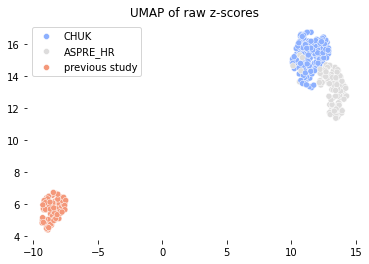

In [8]:
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=clin_df['STUDY'].apply(lambda x: batches[batches_dict[x]]).values, palette='coolwarm')
plt.title('UMAP of raw z-scores')
plt.box(False)
# plt.savefig('umap_before_batch.png', dpi=250, bbox_inches='tight')
plt.show()

In [9]:
met_df_corrected = pycombat(met_df.T, clin_df['STUDY'].values).T

Found 3 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


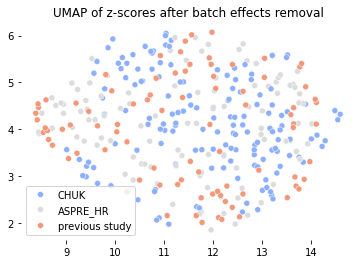

In [10]:
umap_result_corrected = umap_model.fit_transform(met_df_corrected)
sns.scatterplot(x=umap_result_corrected[:, 0], y=umap_result_corrected[:, 1], hue=clin_df['STUDY'].apply(lambda x: batches[batches_dict[x]]).values, palette='coolwarm')
plt.title('UMAP of z-scores after batch effects removal')
plt.box(False)
plt.savefig('umap_after_batch.png', dpi=250)
plt.show()
plt.show()

In [11]:
outliers = set()  #set(clin_df.iloc[umap_result_corrected[:, 0] < 8.5, :].index)  # Check UMAP then set threshold
met_df_corr_filt = met_df_corrected[~met_df_corrected.index.isin(outliers)].copy()
met_df_corr_filt.loc[:, 'pe'] = clin_df['pe']
met_df_corr_filt.loc[:, 'ga.w'] = clin_df['ga.w']
met_df_corr_filt.loc[:, 'ASA'] = clin_df['ASA']
clin_filt_df = clin_df[~clin_df.index.isin(outliers)]
met_df_corr_filt.shape

(344, 528)

In [12]:
met_df_corr_filt

CHEMICAL_NAME,spermidine,1-methylnicotinamide,"12,13-DiHOME",alpha-ketoglutarate,kynurenate,3-phosphoglycerate,cholate,"5,6-dihydrothymine","9,10-DiHOME",linoleate (18:2n6),...,dodecadienoate (12:2)*,N-acetyl-isoputreanine,glucuronide of piperine metabolite C17H21NO3 (4)*,sulfate of piperine metabolite C16H19NO3 (2)*,sulfate of piperine metabolite C16H19NO3 (3)*,sulfate of piperine metabolite C18H21NO3 (1)*,sulfate of piperine metabolite C18H21NO3 (3)*,pe,ga.w,ASA
BAYL-08997,-0.286571,-0.815834,-0.870362,-0.214411,0.177038,-0.390501,-0.335638,-0.888478,-0.850481,-0.896163,...,-0.959272,-1.473403,-0.524333,-0.721080,-0.663478,-0.673977,-0.506003,1.0,13.400000,True
BAYL-08998,-0.602523,0.685851,-0.835227,-0.071667,0.187460,0.649138,0.109823,-0.139081,-0.880518,-0.843660,...,-1.395096,-0.714445,-0.856199,-0.215846,-0.186106,-0.241607,-0.175867,1.0,13.700000,True
BAYL-08999,-0.199185,-0.684607,3.465233,0.729203,2.038830,0.422575,-0.083810,-0.489472,2.318804,1.571811,...,-0.042775,-0.737948,0.098474,-0.274140,-0.148754,0.010231,0.798479,0.0,13.400000,True
BAYL-09000,-0.275981,0.816073,0.550790,-0.230724,-0.541711,0.082574,-0.299062,-0.385480,0.169883,-0.646709,...,-0.757635,-0.545475,-0.600779,-0.595831,-0.595977,-0.870518,-0.695810,0.0,14.600000,True
BAYL-09001,-0.190670,-0.600036,-0.713074,0.595595,-0.875843,-0.162268,-0.013408,4.422950,-0.808956,0.871054,...,1.123586,-0.608379,-0.224374,0.677488,0.606995,0.113661,0.706888,0.0,13.100000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s_23077,-1.104168,-0.737232,0.354517,0.051595,-1.610757,-0.909409,-0.153698,-0.033276,-0.282290,-0.719215,...,-1.788862,0.144833,-0.670509,0.428230,0.410241,0.484324,0.349684,0.0,21.600000,False
s_23123,-0.426422,0.242386,-0.705730,-0.271371,-0.703841,-0.857799,-0.245339,-1.493998,-0.537797,-0.569394,...,-0.141950,0.124281,-0.923275,-0.303200,-0.402520,-0.099562,-0.215420,0.0,22.000000,False
s_22787,0.565867,-1.089084,-1.654426,0.527096,-1.341556,-0.632016,-0.052199,-0.041030,-1.693692,-0.850535,...,-0.808591,0.724791,-0.959821,-0.126248,-0.044032,0.094003,-0.009327,0.0,22.100000,False
s_23294,-1.036038,0.867787,2.248981,-0.918900,-0.369665,-1.372020,-1.487119,0.060840,1.552945,-0.424926,...,-0.279877,0.070856,0.764732,0.792966,0.849809,0.745832,0.587926,0.0,22.100000,False


In [13]:
# Read again metabolite names now with Chemical name
met_names_df = pd.read_excel('../data/BAYL-04-22MD+ Data Tables Updated.xlsx', sheet_name='Chemical Annotation')
met_names_df = met_names_df.loc[:, ['CHEMICAL_NAME', 'CHEM_ID']]
met_names_dict = {x[0]: x[1] for x in met_names_df.values}
met_names_dict['pe'] = 'pe'
met_names_dict['ga.w'] = 'ga.w'
met_names_dict['ASA'] = 'ASA'
met_names_df.set_index('CHEMICAL_NAME', inplace=True)
met_names_df.head()


met_df_corr_filt.columns = [met_names_dict[x] for x in met_df_corr_filt.columns]
met_df_corr_filt

,50,55,62,93,98,132,136,158,179,180,...,100020478,100020487,100020492,100020496,100020497,100020502,100020504,pe,ga.w,ASA
BAYL-08997,-0.286571,-0.815834,-0.870362,-0.214411,0.177038,-0.390501,-0.335638,-0.888478,-0.850481,-0.896163,...,-0.959272,-1.473403,-0.524333,-0.721080,-0.663478,-0.673977,-0.506003,1.0,13.400000,True
BAYL-08998,-0.602523,0.685851,-0.835227,-0.071667,0.187460,0.649138,0.109823,-0.139081,-0.880518,-0.843660,...,-1.395096,-0.714445,-0.856199,-0.215846,-0.186106,-0.241607,-0.175867,1.0,13.700000,True
BAYL-08999,-0.199185,-0.684607,3.465233,0.729203,2.038830,0.422575,-0.083810,-0.489472,2.318804,1.571811,...,-0.042775,-0.737948,0.098474,-0.274140,-0.148754,0.010231,0.798479,0.0,13.400000,True
BAYL-09000,-0.275981,0.816073,0.550790,-0.230724,-0.541711,0.082574,-0.299062,-0.385480,0.169883,-0.646709,...,-0.757635,-0.545475,-0.600779,-0.595831,-0.595977,-0.870518,-0.695810,0.0,14.600000,True
BAYL-09001,-0.190670,-0.600036,-0.713074,0.595595,-0.875843,-0.162268,-0.013408,4.422950,-0.808956,0.871054,...,1.123586,-0.608379,-0.224374,0.677488,0.606995,0.113661,0.706888,0.0,13.100000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s_23077,-1.104168,-0.737232,0.354517,0.051595,-1.610757,-0.909409,-0.153698,-0.033276,-0.282290,-0.719215,...,-1.788862,0.144833,-0.670509,0.428230,0.410241,0.484324,0.349684,0.0,21.600000,False
s_23123,-0.426422,0.242386,-0.705730,-0.271371,-0.703841,-0.857799,-0.245339,-1.493998,-0.537797,-0.569394,...,-0.141950,0.124281,-0.923275,-0.303200,-0.402520,-0.099562,-0.215420,0.0,22.000000,False
s_22787,0.565867,-1.089084,-1.654426,0.527096,-1.341556,-0.632016,-0.052199,-0.041030,-1.693692,-0.850535,...,-0.808591,0.724791,-0.959821,-0.126248,-0.044032,0.094003,-0.009327,0.0,22.100000,False
s_23294,-1.036038,0.867787,2.248981,-0.918900,-0.369665,-1.372020,-1.487119,0.060840,1.552945,-0.424926,...,-0.279877,0.070856,0.764732,0.792966,0.849809,0.745832,0.587926,0.0,22.100000,False


No-aspirin group — noPE: 74,  PE: 77  |  features: 525
Optimal components: 8  |  CV RMSE: 2.11 weeks

Predicted ga.w — noPE: 21.88  PE: 21.77  Δ = -0.11 w
Actual   ga.w  — noPE: 21.88  PE: 21.18  Δ = -0.70 w
Welch t = -0.09,  p = 0.9257


/var/folders/2h/45bqs84942sfxfwfndsxtgs40000gn/T/ipykernel_98272/2806330033.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot  (x='Group', y='Predicted ga.w', data=df_plot, palette=palette,
/var/folders/2h/45bqs84942sfxfwfndsxtgs40000gn/T/ipykernel_98272/2806330033.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Group', y='Predicted ga.w', data=df_plot, palette=palette,


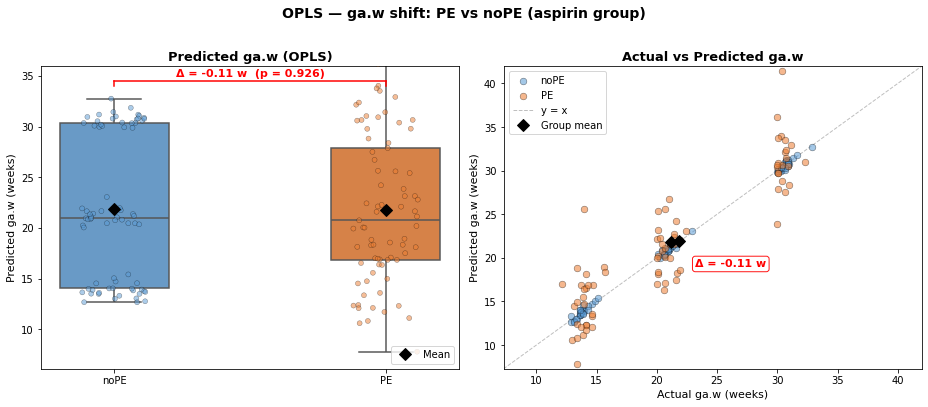

In [14]:
from sklearn.cross_decomposition import PLSRegression
from scipy.stats import ttest_ind

# ── Filter to no-aspirin (placebo) group ────────────────────────────────────
no_asa       = met_df_corr_filt[met_df_corr_filt['ASA'] == True].copy()
feature_cols = [c for c in no_asa.columns if c not in ['pe', 'ga.w', 'ASA']]

noPE = no_asa[no_asa['pe'] == 0.0]
PE   = no_asa[no_asa['pe'] == 1.0]
print(f"No-aspirin group — noPE: {len(noPE)},  PE: {len(PE)}  |  features: {len(feature_cols)}")

X_noPE, y_noPE = noPE[feature_cols].values, noPE['ga.w'].values
X_PE,   y_PE   = PE[feature_cols].values,    PE['ga.w'].values

# ── Pick n_components by 5-fold CV on noPE ──────────────────────────────────
max_comp = min(10, X_noPE.shape[0] - 1)
cv_mse   = {n: -cross_val_score(PLSRegression(n_components=n),
                                X_noPE, y_noPE, cv=5,
                                scoring='neg_mean_squared_error').mean()
            for n in range(1, max_comp + 1)}
best_n   = min(cv_mse, key=cv_mse.get)
print(f"Optimal components: {best_n}  |  CV RMSE: {np.sqrt(cv_mse[best_n]):.2f} weeks")

# ── Train OPLS on noPE; predict both groups ─────────────────────────────────
# For a single response variable, PLS component 1 == OPLS predictive component.
opls      = PLSRegression(n_components=best_n).fit(X_noPE, y_noPE)
pred_noPE = opls.predict(X_noPE).ravel()
pred_PE   = opls.predict(X_PE).ravel()

# ── Shift of means & significance ───────────────────────────────────────────
shift        = pred_PE.mean() - pred_noPE.mean()
actual_shift = y_PE.mean() - y_noPE.mean()
t_stat, p_val = ttest_ind(pred_PE, pred_noPE, equal_var=False)

print(f"\nPredicted ga.w — noPE: {pred_noPE.mean():.2f}  PE: {pred_PE.mean():.2f}  Δ = {shift:+.2f} w")
print(f"Actual   ga.w  — noPE: {y_noPE.mean():.2f}  PE: {y_PE.mean():.2f}  Δ = {actual_shift:+.2f} w")
print(f"Welch t = {t_stat:.2f},  p = {p_val:.4f}")

# ── Visualisation ────────────────────────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(13, 5.5))
palette   = {'noPE': '#5A9BD5', 'PE': '#ED7D31'}

# ── Panel A: predicted ga.w distributions ───────────────────────────────────
df_plot = pd.DataFrame({
    'Predicted ga.w': np.concatenate([pred_noPE, pred_PE]),
    'Group'         : ['noPE']*len(pred_noPE) + ['PE']*len(pred_PE)
})
sns.boxplot  (x='Group', y='Predicted ga.w', data=df_plot, palette=palette,
              width=0.4, linewidth=1.5, showfliers=False, ax=axes[0])
sns.stripplot(x='Group', y='Predicted ga.w', data=df_plot, palette=palette,
              alpha=0.5, size=5, jitter=0.12, edgecolor='k', linewidth=0.4, ax=axes[0])

# Mean diamonds
axes[0].plot([0, 1], [pred_noPE.mean(), pred_PE.mean()],
             'D', color='k', markersize=8, zorder=5, label='Mean')

# Significance bracket above data
y_top  = max(np.percentile(pred_noPE, 97), np.percentile(pred_PE, 97))
tick_h = 0.5
axes[0].plot([0, 0], [y_top, y_top + tick_h],          color='red', lw=1.5)
axes[0].plot([1, 1], [y_top, y_top + tick_h],          color='red', lw=1.5)
axes[0].plot([0, 1], [y_top + tick_h, y_top + tick_h], color='red', lw=1.5)

sig_str = 'p < 0.001' if p_val < 0.001 else f'p = {p_val:.3f}'
axes[0].text(0.5, y_top + tick_h + 0.25,
             f'Δ = {shift:+.2f} w  ({sig_str})',
             ha='center', va='bottom', fontsize=11, color='red', fontweight='bold')
axes[0].set_ylim(None, y_top + tick_h + 1.5)

axes[0].set_title('Predicted ga.w (OPLS)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Predicted ga.w (weeks)', fontsize=11)
axes[0].set_xlabel('')
axes[0].legend(loc='lower right')

# ── Panel B: actual vs predicted scatter ─────────────────────────────────────
for label, act, pred, clr in [('noPE', y_noPE, pred_noPE, '#5A9BD5'),
                               ('PE',   y_PE,   pred_PE,   '#ED7D31')]:
    axes[1].scatter(act, pred, c=clr, s=45, alpha=0.55,
                    edgecolors='k', linewidth=0.5, label=label, zorder=3)
    axes[1].plot(act.mean(), pred.mean(), 'D', color='k', markersize=9, zorder=5)

# y = x reference
lo = min(y_noPE.min(), y_PE.min(), pred_noPE.min(), pred_PE.min()) - 0.5
hi = max(y_noPE.max(), y_PE.max(), pred_noPE.max(), pred_PE.max()) + 0.5
axes[1].plot([lo, hi], [lo, hi], 'k--', alpha=0.25, lw=1, label='y = x')
axes[1].plot([], [], 'D', color='k', markersize=8, label='Group mean')

# Arrow between group-mean points + shift label
axes[1].annotate('', xy=(y_PE.mean(), pred_PE.mean()),
                 xytext=(y_noPE.mean(), pred_noPE.mean()),
                 arrowprops=dict(arrowstyle='->', color='red', lw=2.5))
axes[1].annotate(f'Δ = {shift:+.2f} w',
                 xy=((y_PE.mean()+y_noPE.mean())/2, (pred_PE.mean()+pred_noPE.mean())/2),
                 xytext=(20, -25), textcoords='offset points',
                 fontsize=11, color='red', fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.25', fc='white', ec='red', alpha=0.9))

axes[1].set_xlim(lo, hi);  axes[1].set_ylim(lo, hi)
axes[1].set_xlabel('Actual ga.w (weeks)', fontsize=11)
axes[1].set_ylabel('Predicted ga.w (weeks)', fontsize=11)
axes[1].set_title('Actual vs Predicted ga.w', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10, loc='upper left')

fig.suptitle('OPLS — ga.w shift: PE vs noPE (aspirin group)',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('opls_ga_shift_PE_vs_noPE_aspirin.png', dpi=250, bbox_inches='tight')
plt.show()

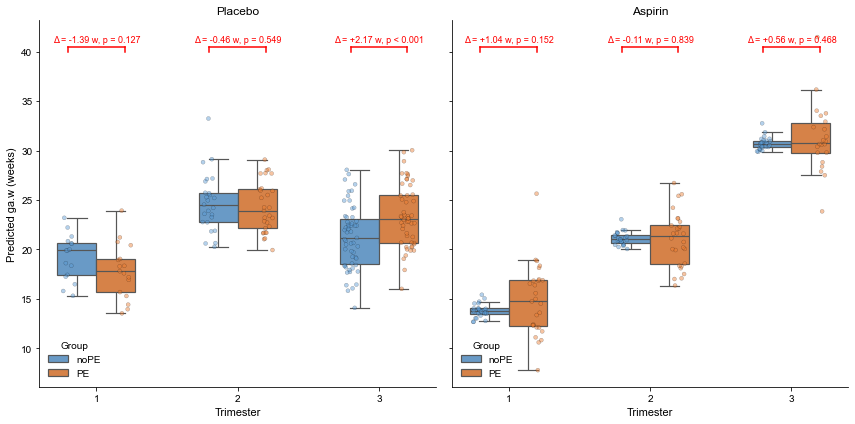

In [16]:
# ── Per-trimester ga.w shift for BOTH aspirin and placebo groups ─────────────
trimester = clin_filt_df.loc[met_df_corr_filt.index, 'trimester']

# Collect data for both groups
placebo_rows = []
aspirin_rows = []

for tri in [1, 2, 3]:
    # Process ASPIRIN group
    asa_data = met_df_corr_filt[met_df_corr_filt['ASA'] == True]
    tri_asa_mask = trimester.loc[asa_data.index] == tri
    tri_asa_noPE = asa_data.loc[tri_asa_mask & (asa_data['pe'] == 0.0)]
    tri_asa_PE = asa_data.loc[tri_asa_mask & (asa_data['pe'] == 1.0)]
    
    # Process PLACEBO group
    placebo_data = met_df_corr_filt[met_df_corr_filt['ASA'] == False]
    tri_pla_mask = trimester.loc[placebo_data.index] == tri
    tri_pla_noPE = placebo_data.loc[tri_pla_mask & (placebo_data['pe'] == 0.0)]
    tri_pla_PE = placebo_data.loc[tri_pla_mask & (placebo_data['pe'] == 1.0)]
    
    # Make predictions for aspirin group
    if len(tri_asa_PE) > 0 and len(tri_asa_noPE) > 0:
        p_asa_noPE = opls.predict(tri_asa_noPE[feature_cols].values).ravel()
        p_asa_PE = opls.predict(tri_asa_PE[feature_cols].values).ravel()
        
        for v in p_asa_noPE:
            aspirin_rows.append({'Trimester': tri, 'Group': 'noPE', 'Predicted ga.w': v})
        for v in p_asa_PE:
            aspirin_rows.append({'Trimester': tri, 'Group': 'PE', 'Predicted ga.w': v})
    
    # Make predictions for placebo group
    if len(tri_pla_PE) > 0 and len(tri_pla_noPE) > 0:
        p_pla_noPE = opls.predict(tri_pla_noPE[feature_cols].values).ravel()
        p_pla_PE = opls.predict(tri_pla_PE[feature_cols].values).ravel()
        
        for v in p_pla_noPE:
            placebo_rows.append({'Trimester': tri, 'Group': 'noPE', 'Predicted ga.w': v})
        for v in p_pla_PE:
            placebo_rows.append({'Trimester': tri, 'Group': 'PE', 'Predicted ga.w': v})

df_placebo = pd.DataFrame(placebo_rows)
df_aspirin = pd.DataFrame(aspirin_rows)

# ── Two-panel figure: Placebo and Aspirin ─────────────────────────────────────
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'normal'

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
palette = {'noPE': '#5A9BD5', 'PE': '#ED7D31'}

y_bracket = 40  # Fixed y-position for all red brackets

# ── Panel 1: Placebo ──────────────────────────────────────────────────────────
if len(df_placebo) > 0:
    sns.boxplot(x='Trimester', y='Predicted ga.w', hue='Group', data=df_placebo,
                palette=palette, width=0.55, hue_order=['noPE', 'PE'],
                order=[1, 2, 3], showfliers=False, ax=axes[0], linewidth=1.2)
    sns.stripplot(x='Trimester', y='Predicted ga.w', hue='Group', data=df_placebo,
                  palette=palette, hue_order=['noPE', 'PE'], order=[1, 2, 3],
                  dodge=True, alpha=0.45, size=4, edgecolor='k', linewidth=0.3, ax=axes[0])
    
    # Add red brackets at y=40 for each trimester
    for idx, tri in enumerate([1, 2, 3]):
        mask = df_placebo['Trimester'] == tri
        noPE_vals = df_placebo.loc[mask & (df_placebo['Group'] == 'noPE'), 'Predicted ga.w'].values
        PE_vals = df_placebo.loc[mask & (df_placebo['Group'] == 'PE'), 'Predicted ga.w'].values
        
        if len(PE_vals) > 1 and len(noPE_vals) > 1:
            shift = PE_vals.mean() - noPE_vals.mean()
            _, p_val = ttest_ind(PE_vals, noPE_vals, equal_var=False)
            
            # Draw red bracket at y_bracket
            tick_h = 0.5
            bracket_left = idx - 0.2
            bracket_right = idx + 0.2
            
            axes[0].plot([bracket_left, bracket_left], [y_bracket, y_bracket + tick_h], 
                        color='red', lw=1.5)
            axes[0].plot([bracket_right, bracket_right], [y_bracket, y_bracket + tick_h], 
                        color='red', lw=1.5)
            axes[0].plot([bracket_left, bracket_right], [y_bracket + tick_h, y_bracket + tick_h], 
                        color='red', lw=1.5)
            
            # Add text annotation
            sig_str = 'p < 0.001' if p_val < 0.001 else f'p = {p_val:.3f}'
            axes[0].text(idx, y_bracket + tick_h + 0.3,
                        f'Δ = {shift:+.2f} w, {sig_str}',
                        ha='center', va='bottom', fontsize=9, color='red')
    
    axes[0].set_title('Placebo', fontsize=12, weight='normal')
    axes[0].set_ylabel('Predicted ga.w (weeks)', fontsize=11, weight='normal')
    axes[0].set_xlabel('Trimester', fontsize=11, weight='normal')
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['right'].set_visible(False)
    
    # Legend without grid
    h, l = axes[0].get_legend_handles_labels()
    seen, uh, ul = set(), [], []
    for handle, label in zip(h, l):
        if label not in seen:
            seen.add(label)
            uh.append(handle)
            ul.append(label)
    axes[0].legend(uh, ul, title='Group', fontsize=10, frameon=False)

# ── Panel 2: Aspirin ──────────────────────────────────────────────────────────
if len(df_aspirin) > 0:
    sns.boxplot(x='Trimester', y='Predicted ga.w', hue='Group', data=df_aspirin,
                palette=palette, width=0.55, hue_order=['noPE', 'PE'],
                order=[1, 2, 3], showfliers=False, ax=axes[1], linewidth=1.2)
    sns.stripplot(x='Trimester', y='Predicted ga.w', hue='Group', data=df_aspirin,
                  palette=palette, hue_order=['noPE', 'PE'], order=[1, 2, 3],
                  dodge=True, alpha=0.45, size=4, edgecolor='k', linewidth=0.3, ax=axes[1])
    
    # Add red brackets at y=40 for each trimester
    for idx, tri in enumerate([1, 2, 3]):
        mask = df_aspirin['Trimester'] == tri
        noPE_vals = df_aspirin.loc[mask & (df_aspirin['Group'] == 'noPE'), 'Predicted ga.w'].values
        PE_vals = df_aspirin.loc[mask & (df_aspirin['Group'] == 'PE'), 'Predicted ga.w'].values
        
        if len(PE_vals) > 1 and len(noPE_vals) > 1:
            shift = PE_vals.mean() - noPE_vals.mean()
            _, p_val = ttest_ind(PE_vals, noPE_vals, equal_var=False)
            
            # Draw red bracket at y_bracket
            tick_h = 0.5
            bracket_left = idx - 0.2
            bracket_right = idx + 0.2
            
            axes[1].plot([bracket_left, bracket_left], [y_bracket, y_bracket + tick_h], 
                        color='red', lw=1.5)
            axes[1].plot([bracket_right, bracket_right], [y_bracket, y_bracket + tick_h], 
                        color='red', lw=1.5)
            axes[1].plot([bracket_left, bracket_right], [y_bracket + tick_h, y_bracket + tick_h], 
                        color='red', lw=1.5)
            
            # Add text annotation
            sig_str = 'p < 0.001' if p_val < 0.001 else f'p = {p_val:.3f}'
            axes[1].text(idx, y_bracket + tick_h + 0.3,
                        f'Δ = {shift:+.2f} w, {sig_str}',
                        ha='center', va='bottom', fontsize=9, color='red')
    
    axes[1].set_title('Aspirin', fontsize=12, weight='normal')
    axes[1].set_ylabel('', fontsize=11, weight='normal')
    axes[1].set_xlabel('Trimester', fontsize=11, weight='normal')
    axes[1].spines['top'].set_visible(False)
    axes[1].spines['right'].set_visible(False)
    
    # Legend without grid
    h, l = axes[1].get_legend_handles_labels()
    seen, uh, ul = set(), [], []
    for handle, label in zip(h, l):
        if label not in seen:
            seen.add(label)
            uh.append(handle)
            ul.append(label)
    axes[1].legend(uh, ul, title='Group', fontsize=10, frameon=False)

plt.tight_layout()
plt.savefig('opls_ga_shift_per_trimester.png', dpi=250, bbox_inches='tight')
plt.show()